# Problem Statement

The objective of this project is to predict the rating of recipes based on User Recipe Review dataset containing 15 features related to user reviews.

## Data Loading
- Import necessary libraries.
- Load training and testing datasets.

## Data Exploration
- Obtain information about the dataset.
- Display summary statistics.
- Examine null values.
- Visualize outliers

## Feature Analysis and Engineering
- Identify and Analyzing numeric features.
- Explore and visualize the correlation matrix between numeric features.
- Feature Selection on numeric variables based on correlation
- Identify and Analyzing categorical features.
- Convert CreationTimestamp features to Date and Time.


## Data Preprocessing

- Drop unnecessary columns.
- normalize or Standardize Numerical variables
- Performing text preprocessing
- Encode categorical features if required.


## Model Building and Training
- Split features and target variable using Stratified train test split(For Handling Class Imbalance)
- Build pipeline for model training and evaluation.
- Train and evaluate logistic regression model.
- Train and evaluate Decision Tree Classifier model.
- Train and evaluate RandomForest Classifier model.
- Train and evaluate LGBM Classifier model.
- Train stacked model combining various models.

## Model Comparison
- Compare Test accuracy of different models.

## Stacked Model (Best Model)
- Create instances of individual models.
- Define stacked model using ensemble techniques.
- Build pipeline for stacked model training and evaluation.

## Prediction on Test Dataset
- Utilize Best model for making predictions on test dataset.

## Submission
- Save predictions to CSV for submission.

## Importing Depedencies

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

## Data Loading

In [51]:
train_df = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
test_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

### Understanding Structure of Data

In [52]:
# Print the first few rows of the train DataFrame in a visually appealing way
print("\n\033[1mTrain DataFrame - First Few Rows:\033[0m")
train_df.head()



Train DataFrame - First Few Rows:


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [53]:
# Print the first few rows of the train DataFrame in a visually appealing way
print("\n\033[1mTest DataFrame - First Few Rows:\033[0m")
train_df.head()



Test DataFrame - First Few Rows:


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


## Data Overview

### Train DataFrame Overview

In [54]:
# Function to print a separator line
def print_separator():
    print("-" * 50)

# Print Train DataFrame Overview
print('\n\033[1mTrain DataFrame Overview:\033[0m')
print(f'Number of Rows: \033[94m{train_df.shape[0]}\033[0m')
print(f'Number of Columns: \033[94m{train_df.shape[1]}\033[0m')

# Separator
print_separator()

# Columns and Data Types
print('\n\033[1mColumns and Data Types:\033[0m')
print(train_df.dtypes)

# Separator
print_separator()

# Missing Values
print('\n\033[1mMissing Values:\033[0m')
print(train_df.isnull().sum())

# Separator
print_separator()



Train DataFrame Overview:

Number of Rows: 13636

Number of Columns: 15

--------------------------------------------------



Columns and Data Types:

ID                    int64

RecipeNumber          int64

RecipeCode            int64

RecipeName           object

CommentID            object

UserID               object

UserName             object

UserReputation        int64

CreationTimestamp     int64

ReplyCount            int64

ThumbsUpCount         int64

ThumbsDownCount       int64

Rating                int64

BestScore             int64

Recipe_Review        object

dtype: object

--------------------------------------------------



Missing Values:

ID                   0

RecipeNumber         0

RecipeCode           0

RecipeName           0

CommentID            0

UserID               0

UserName             0

UserReputation       0

CreationTimestamp    0

ReplyCount           0

ThumbsUpCount        0

ThumbsDownCount      0

Rating               0

BestScore    

In [55]:
# Function to print a separator line
def print_separator():
    print("-" * 50)

# Print Test DataFrame Overview
print('\n\033[1mTest DataFrame Overview:\033[0m')
print(f'Number of Rows: \033[94m{test_df.shape[0]}\033[0m')
print(f'Number of Columns: \033[94m{test_df.shape[1]}\033[0m')

# Separator
print_separator()

# Columns and Data Types
print('\n\033[1mColumns and Data Types:\033[0m')
print(test_df.dtypes)

# Separator
print_separator()

# Missing Values
print('\n\033[1mMissing Values:\033[0m')
print(test_df.isnull().sum())

# Separator
print_separator()



Test DataFrame Overview:

Number of Rows: 4546

Number of Columns: 14

--------------------------------------------------



Columns and Data Types:

ID                    int64

RecipeNumber          int64

RecipeCode            int64

RecipeName           object

CommentID            object

UserID               object

UserName             object

UserReputation        int64

CreationTimestamp     int64

ReplyCount            int64

ThumbsUpCount         int64

ThumbsDownCount       int64

BestScore             int64

Recipe_Review        object

dtype: object

--------------------------------------------------



Missing Values:

ID                   0

RecipeNumber         0

RecipeCode           0

RecipeName           0

CommentID            0

UserID               0

UserName             0

UserReputation       0

CreationTimestamp    0

ReplyCount           0

ThumbsUpCount        0

ThumbsDownCount      0

BestScore            0

Recipe_Review        0

dtype: int64

------

### Statistical Summary

In [56]:
# Print Statistical Summary for Train Dataset
print('\n\033[1mStatistical Summary for Train Dataset:\033[0m')
train_df.describe()



Statistical Summary for Train Dataset:


,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


### Check for Duplicate Values

In [57]:
duplicate_rows_train = train_df.duplicated().sum()
duplicate_rows_test = test_df.duplicated().sum()

print('Duplicate Rows in Train Dataset:', duplicate_rows_train)
print('Duplicate Rows in Test Dataset:', duplicate_rows_test)

Duplicate Rows in Train Dataset: 0

Duplicate Rows in Test Dataset: 0


### Identify Outliers

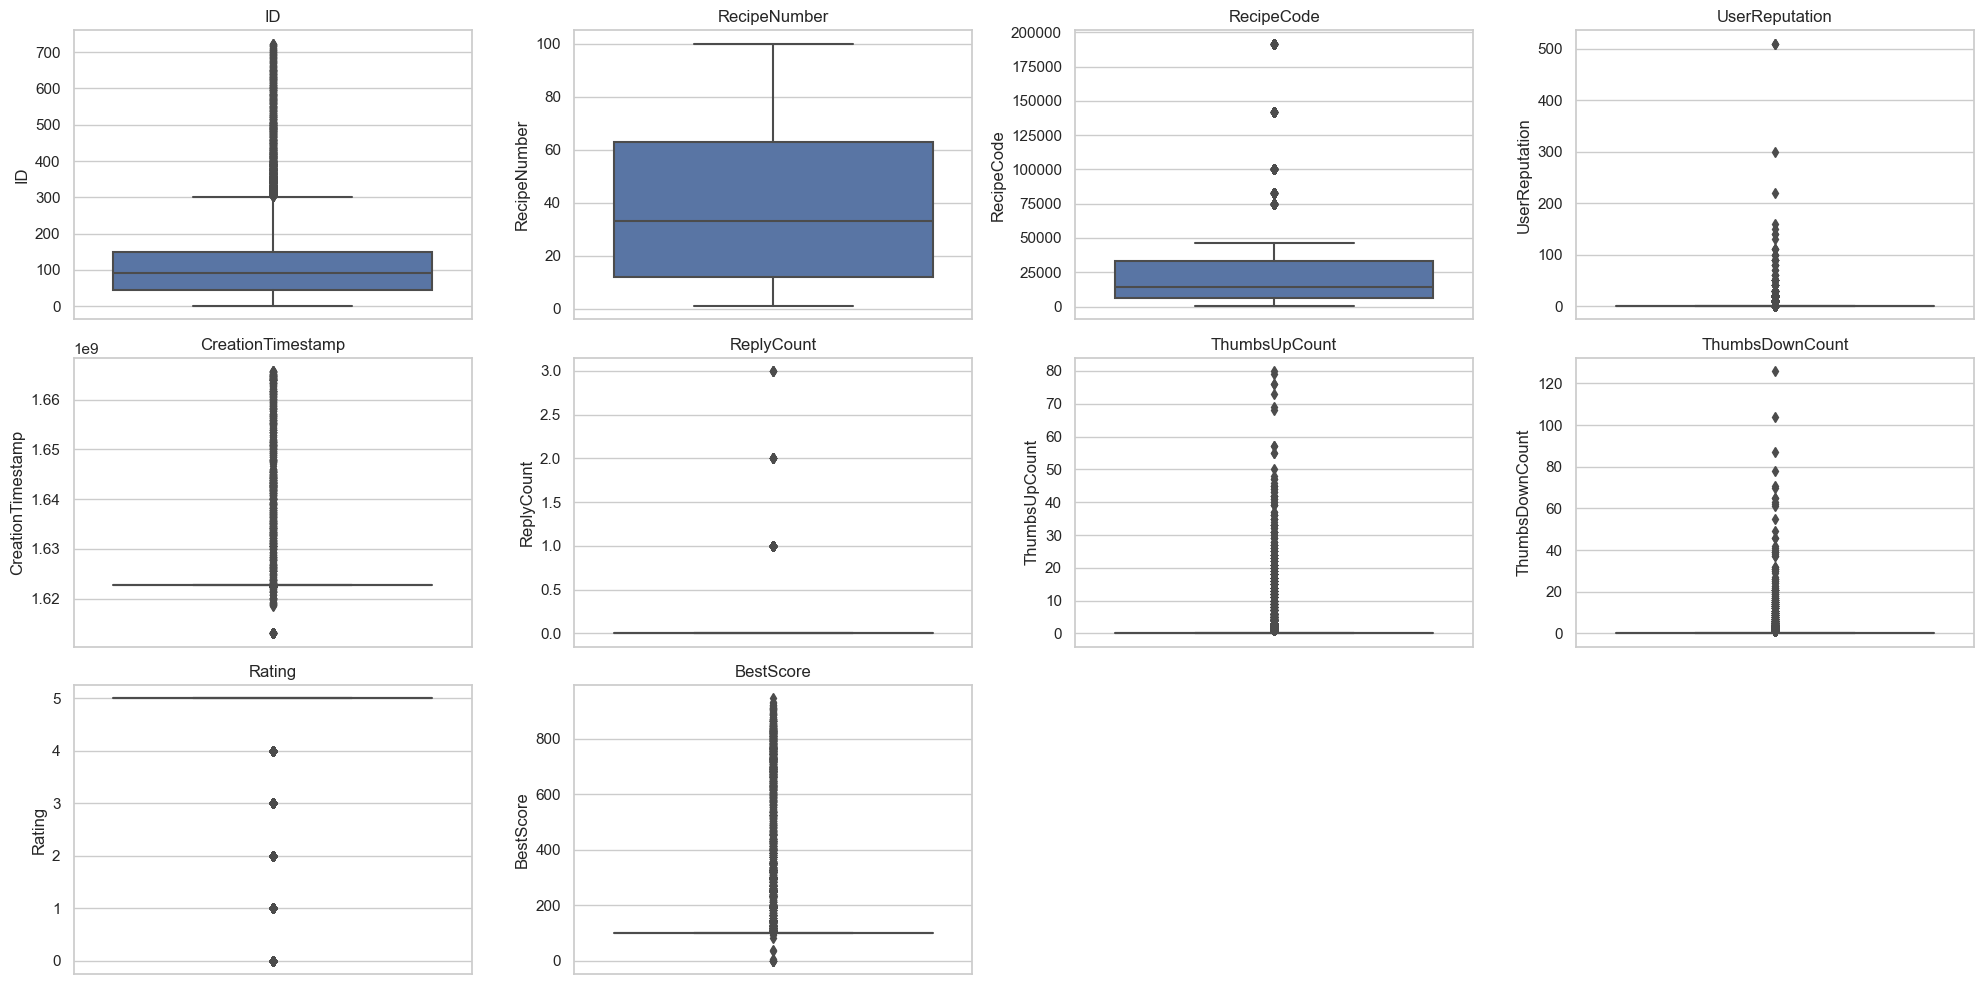

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for outlier analysis
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for numerical features to identify outliers
plt.figure(figsize=(20, 10), facecolor='white')
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=train_df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

## Feature Analysis

### Numeric Feature

<Figure size 1500x1200 with 0 Axes>

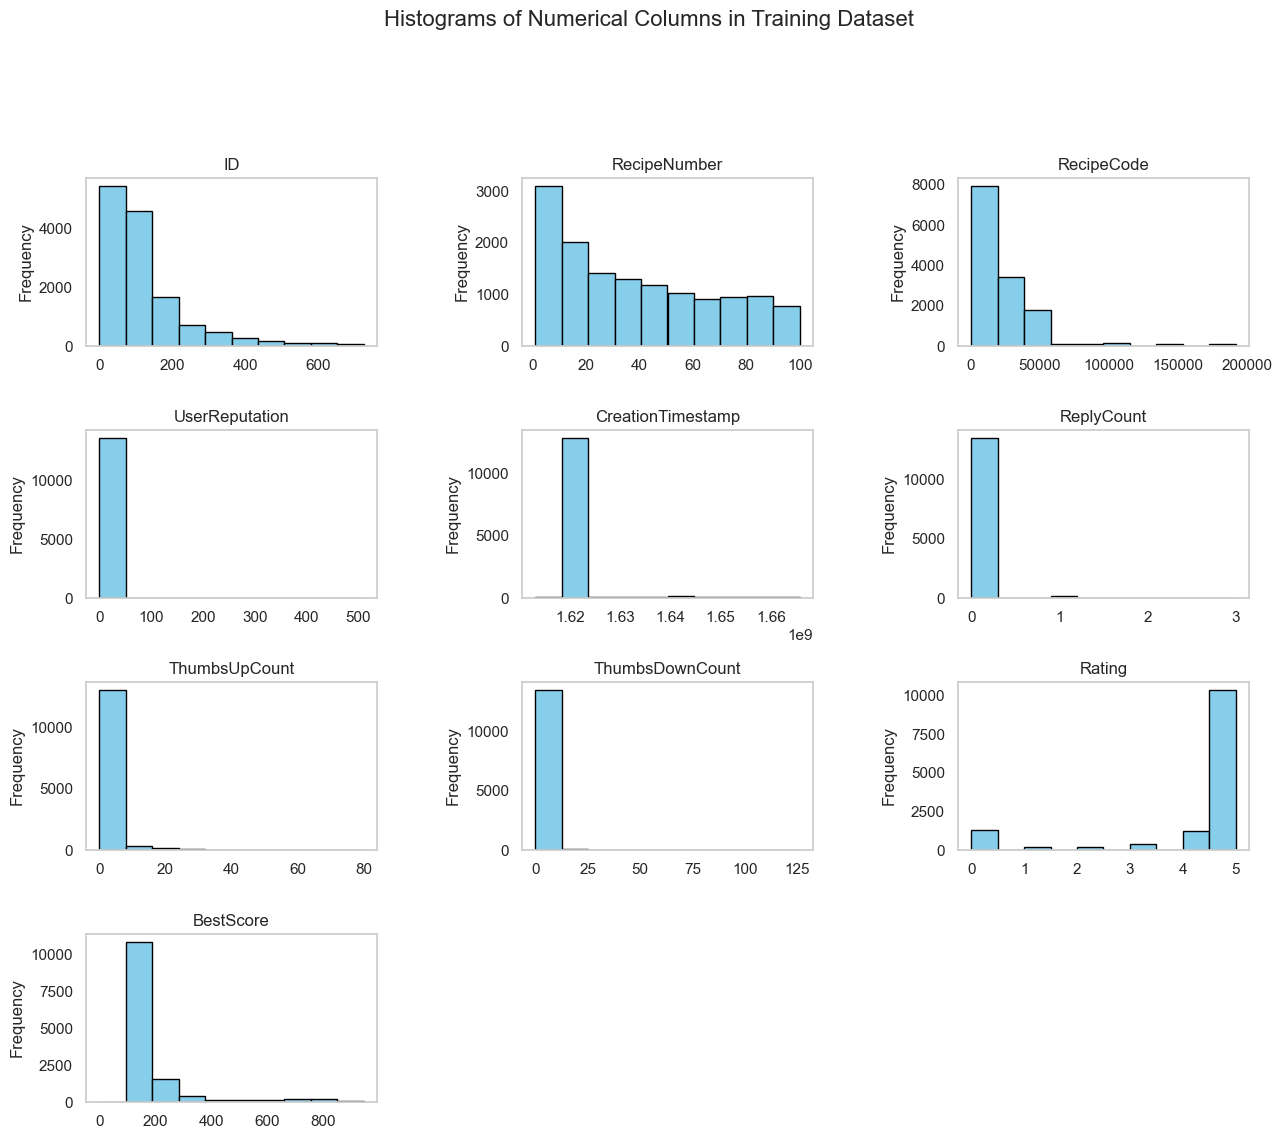

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is your training dataset
plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

# Plot histograms for each numerical column in train_df
train_df.hist(figsize=(15, 12), color='skyblue', edgecolor='black', grid=False)

# Add titles and labels
plt.suptitle('Histograms of Numerical Columns in Training Dataset', fontsize=16, y=1.02)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Add x-axis titles
for ax in plt.gcf().get_axes():
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.xaxis.set_label_coords(0.5, -0.1)  # Adjust x-axis label position

plt.show()

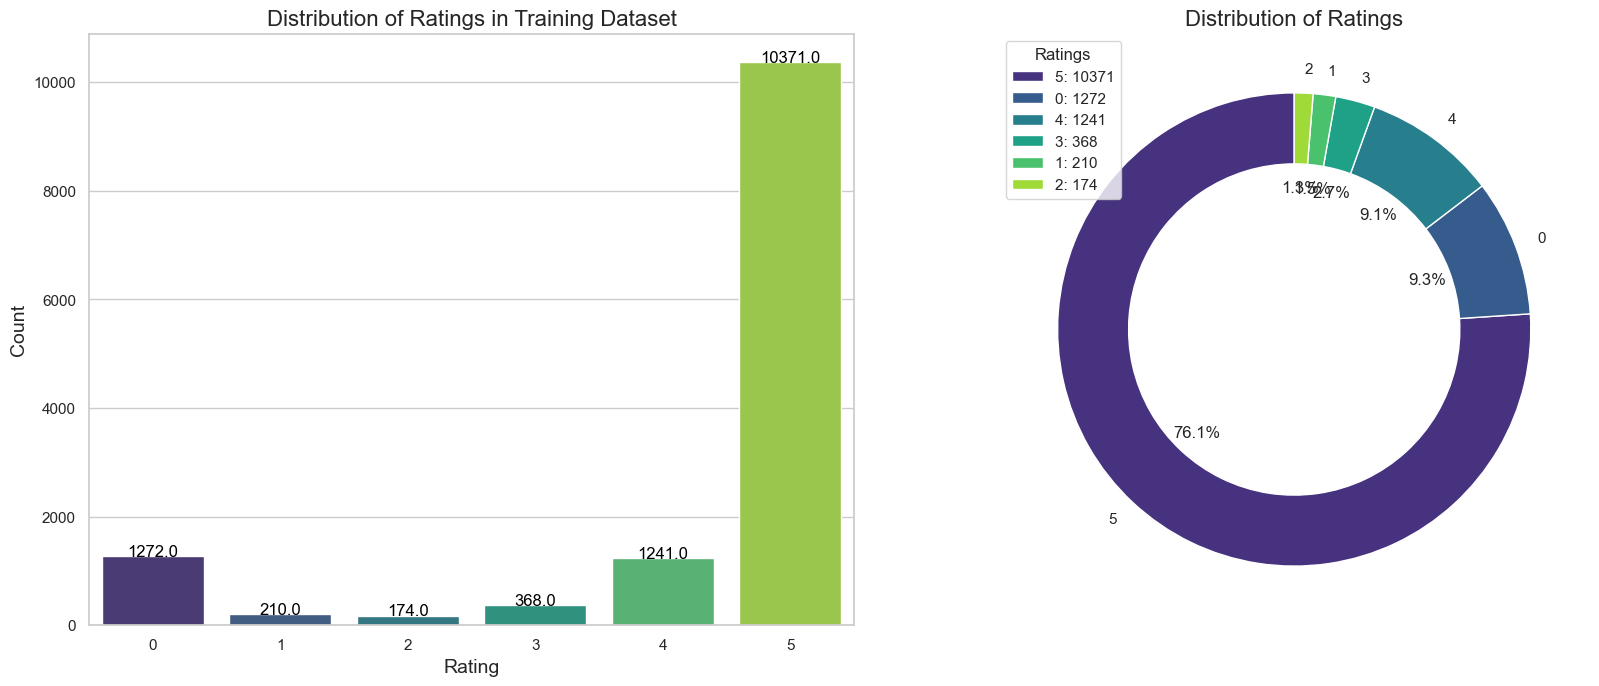

In [60]:
plt.figure(figsize=(18, 8))

# Count plot
plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
rating_plot = sns.countplot(x='Rating', data=train_df, palette='viridis')
plt.title('Distribution of Ratings in Training Dataset', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count annotations on the count plot
for p in rating_plot.patches:
    rating_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

# Pie chart
plt.subplot(1, 2, 2)
rating_counts = train_df['Rating'].value_counts()
colors = sns.color_palette('viridis', len(rating_counts))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Distribution of Ratings', fontsize=16)

# Add legend to the pie chart
plt.legend(title='Ratings', labels=[f'{rating}: {count}' for rating, count in zip(rating_counts.index, rating_counts)])

plt.tight_layout(pad=4)
plt.show()

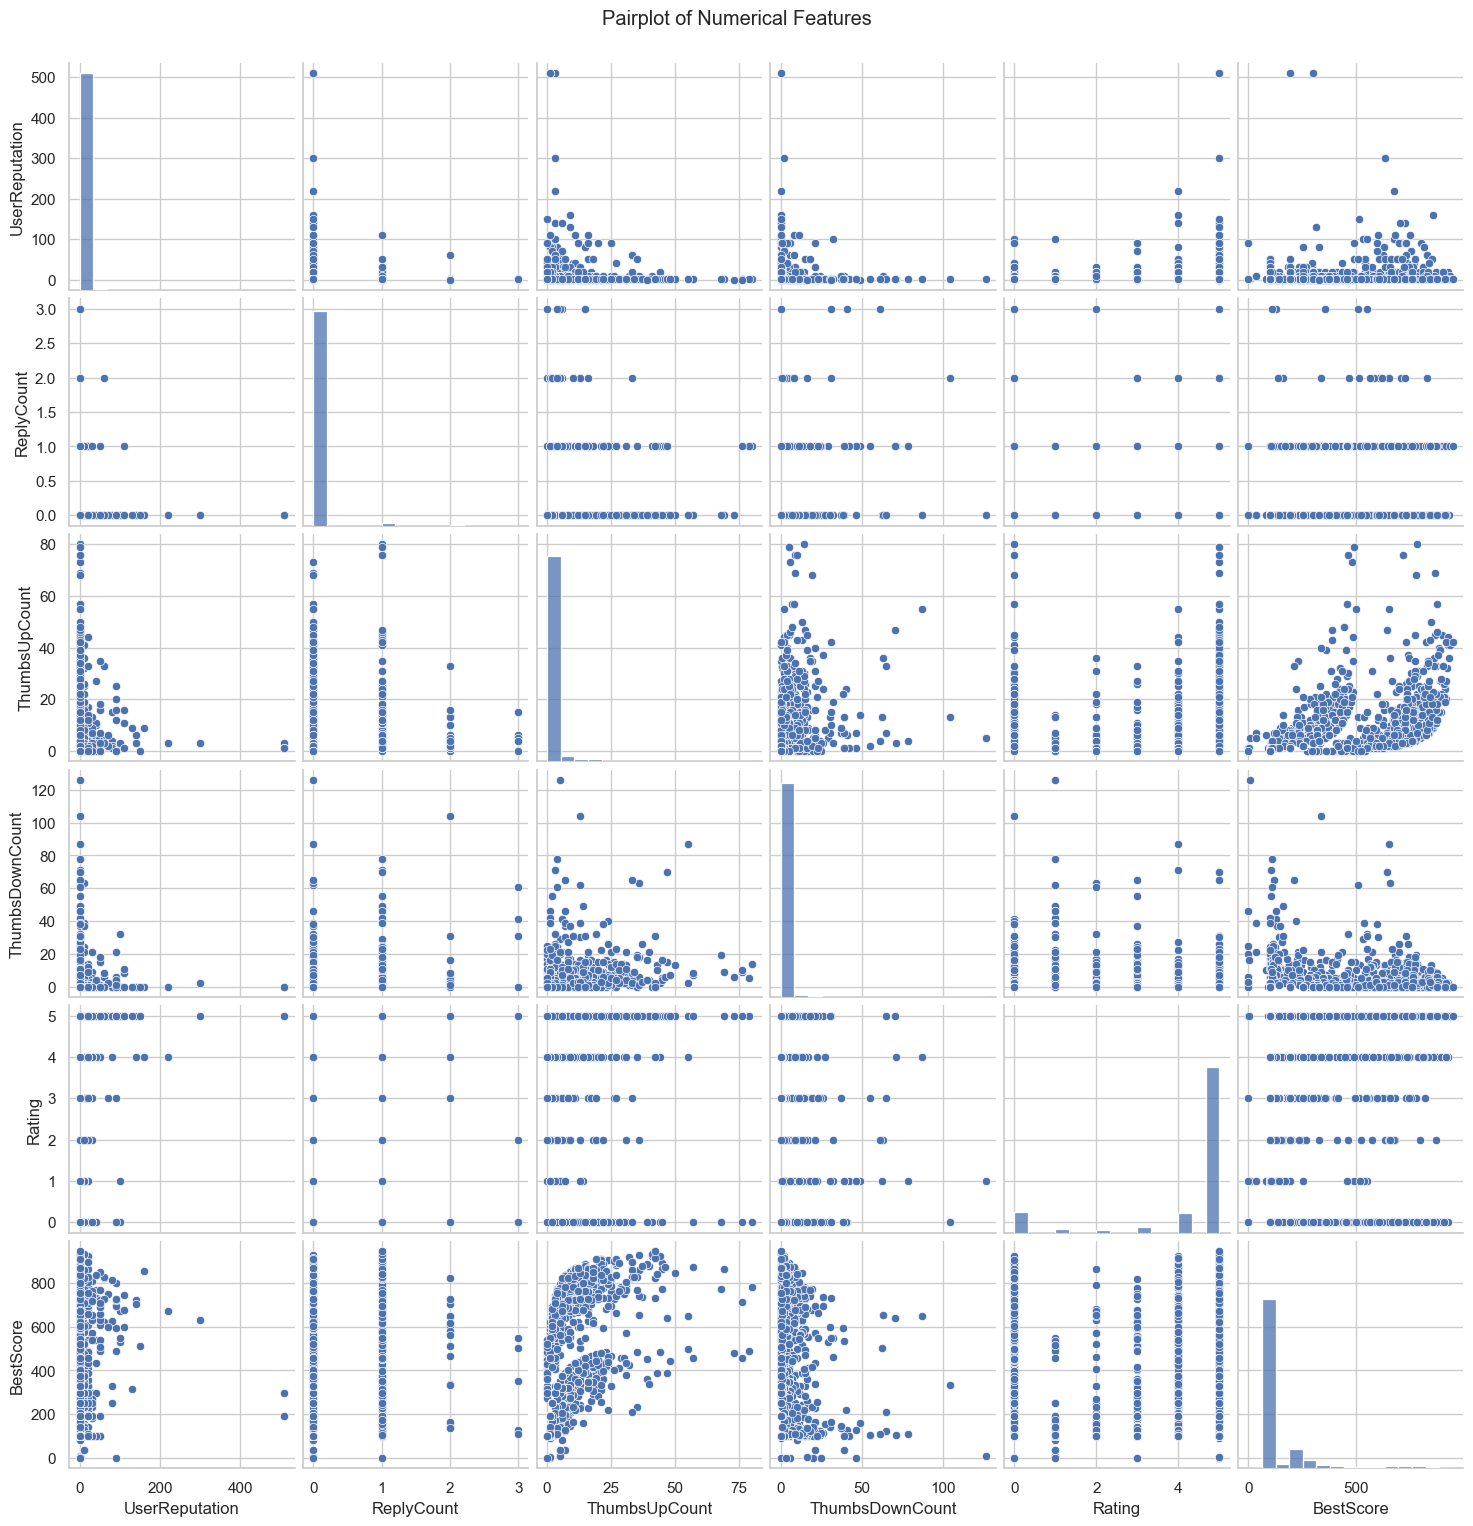

In [61]:
# Use pairplot to visualize relationships between numerical features
numerical_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
sns.pairplot(train_df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02) # Adjust title position
plt.show()

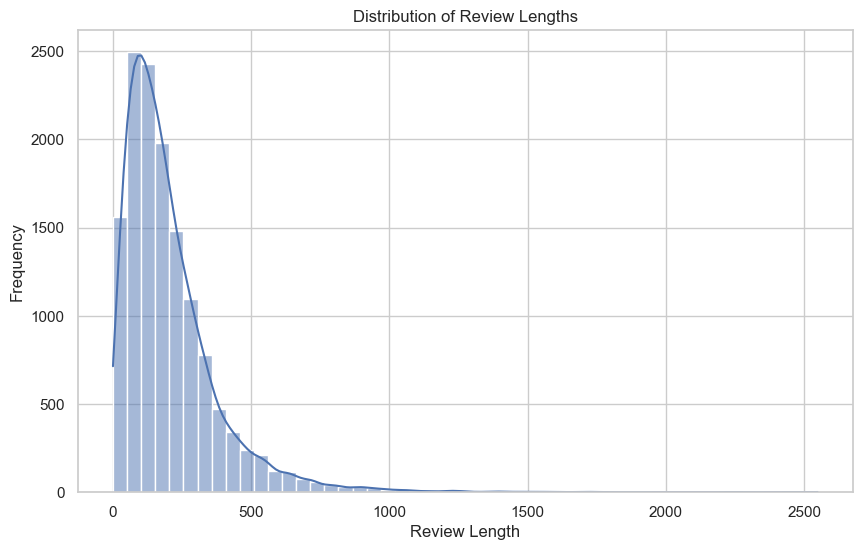

In [62]:
# Calculate the length of each review in the training dataset
train_df['ReviewLength'] = train_df['Recipe_Review'].astype(str).apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ReviewLength'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Calculate the length of each review in the training dataset
test_df['ReviewLength'] = test_df['Recipe_Review'].astype(str).apply(len)

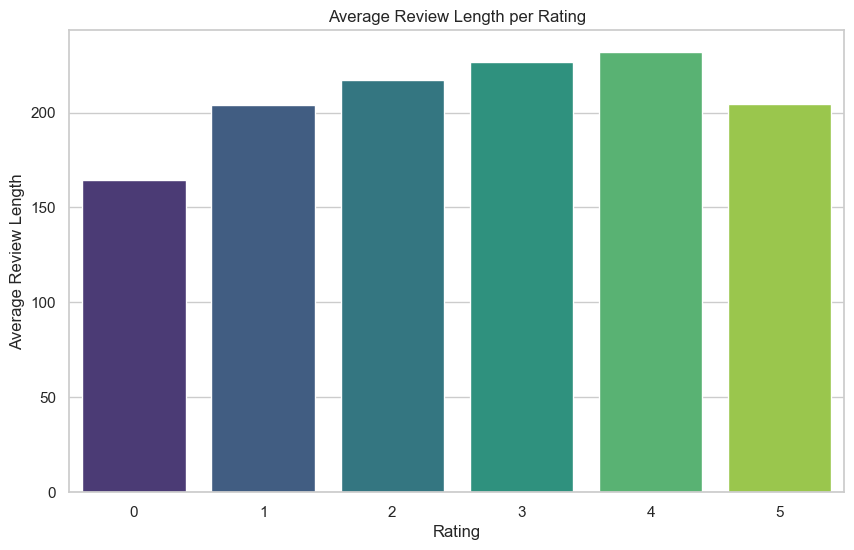

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_df' is your training dataset
# Calculate average review length per rating class
avg_review_length_per_rating = train_df.groupby('Rating')['ReviewLength'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='ReviewLength', data=avg_review_length_per_rating, palette='viridis')
plt.title('Average Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.show()

## Feature Engineering

In [65]:
# Convert Unix timestamp to datetime
train_df['DateTime'] = pd.to_datetime(train_df['CreationTimestamp'], unit='s')

# Extract Year, Month, and Date into separate columns
train_df['Year'] = train_df['DateTime'].dt.year
train_df['Month'] = train_df['DateTime'].dt.month
train_df['Day'] = train_df['DateTime'].dt.day
train_df['Hour'] = train_df['DateTime'].dt.hour

In [66]:
# Convert Unix timestamp to datetime
test_df['DateTime'] = pd.to_datetime(test_df['CreationTimestamp'], unit='s')

# Extract Year, Month, and Date into separate columns
test_df['Year'] = test_df['DateTime'].dt.year
test_df['Month'] = test_df['DateTime'].dt.month
test_df['Day'] = test_df['DateTime'].dt.day
test_df['Hour'] = test_df['DateTime'].dt.hour

In [67]:
train_df.drop(columns=['DateTime', 'CreationTimestamp'], inplace=True)

In [68]:
test_df.drop(columns=['DateTime', 'CreationTimestamp'], inplace=True)

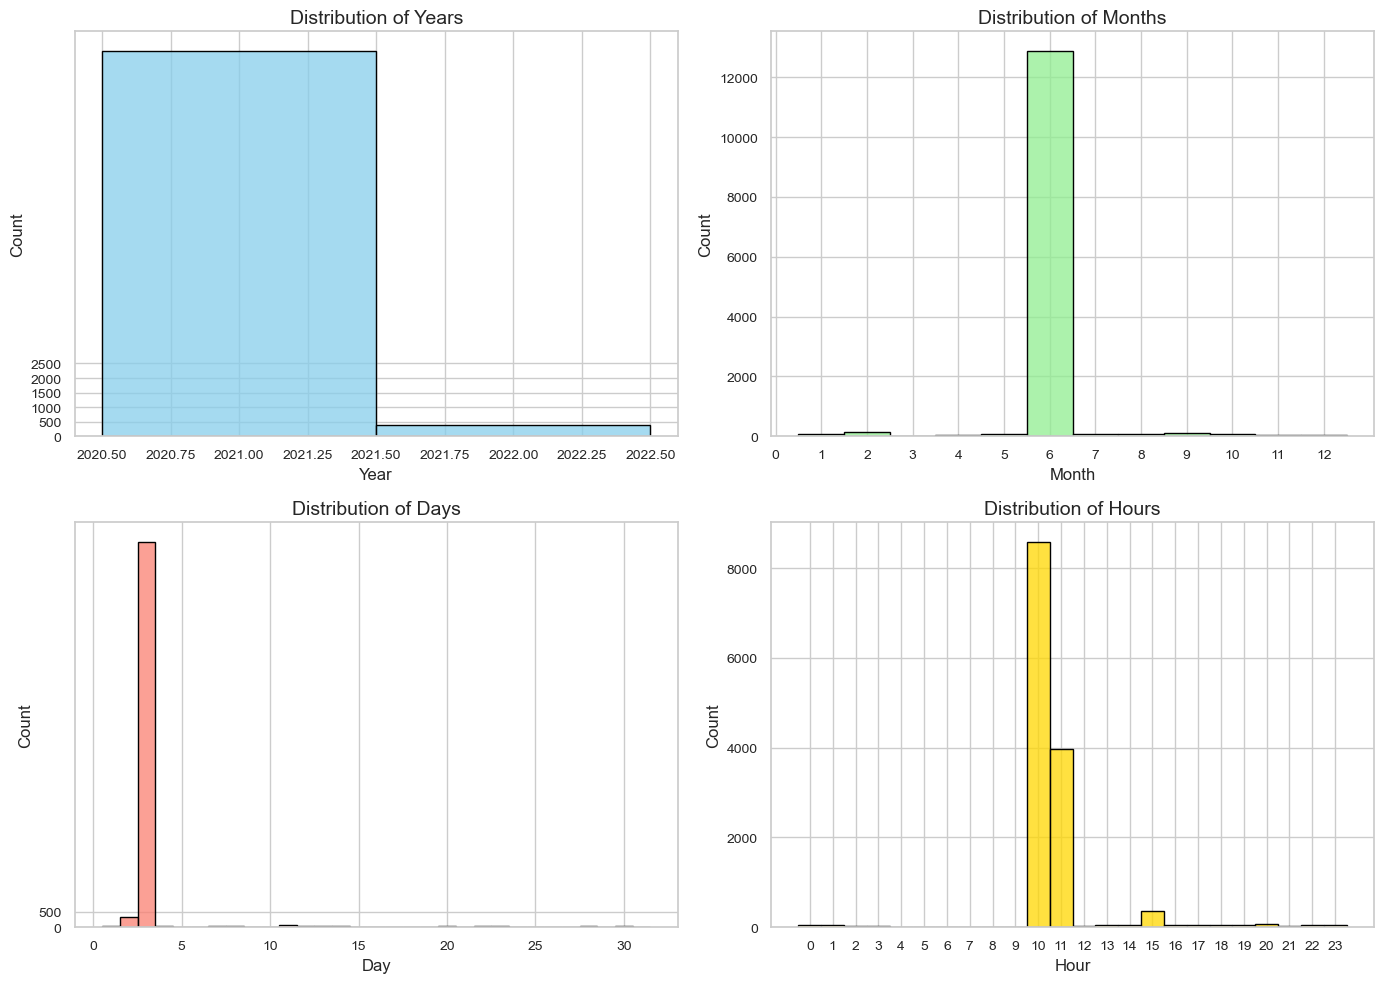

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot distributions of year, month, day, and hour
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data=train_df, x='Year', discrete=True, ax=axs[0, 0], color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Years', fontsize=14)
axs[0, 0].set_ylabel('Count', fontsize=12)
axs[0, 0].tick_params(axis='both', which='major', labelsize=10)
axs[0, 0].set_yticks(range(0, max(train_df['Year']) + 500, 500))  # Adjusted y-labels in a range of 500

sns.histplot(data=train_df, x='Month', discrete=True, ax=axs[0, 1], color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Distribution of Months', fontsize=14)
axs[0, 1].set_ylabel('Count', fontsize=12)
axs[0, 1].tick_params(axis='both', which='major', labelsize=10)
axs[0, 1].set_xticks(range(13))  # Setting x-ticks to integer values starting from 0 to 12 (months)

sns.histplot(data=train_df, x='Day', discrete=True, ax=axs[1, 0], color='salmon', edgecolor='black')
axs[1, 0].set_title('Distribution of Days', fontsize=14)
axs[1, 0].set_ylabel('Count', fontsize=12)
axs[1, 0].tick_params(axis='both', which='major', labelsize=10)
axs[1, 0].set_yticks(range(0, max(train_df['Day']) + 500, 500))  # Adjusted y-labels in a range of 500

sns.histplot(data=train_df, x='Hour', discrete=True, ax=axs[1, 1], color='gold', edgecolor='black')
axs[1, 1].set_title('Distribution of Hours', fontsize=14)
axs[1, 1].set_ylabel('Count', fontsize=12)
axs[1, 1].tick_params(axis='both', which='major', labelsize=10)
axs[1, 1].set_xticks(range(24))  # Setting x-ticks to integer values starting from 0 to 23 (hours)

plt.tight_layout()
plt.show()

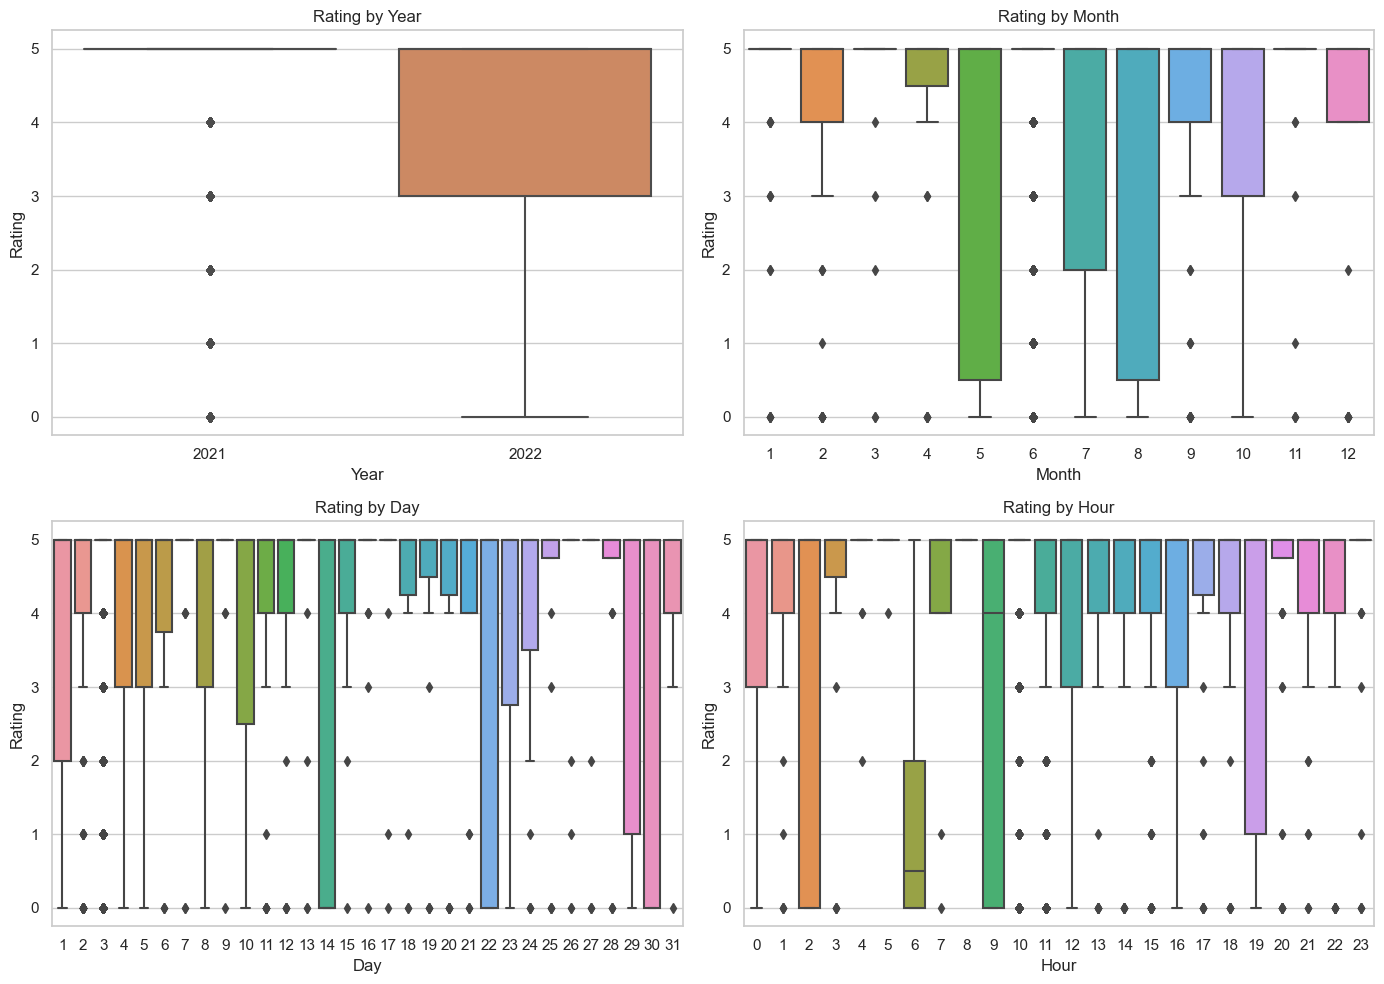

In [70]:
# Check the relationship of newly created features with Rating
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='Year', y='Rating', data=train_df, ax=axs[0, 0])
axs[0, 0].set_title('Rating by Year')

sns.boxplot(x='Month', y='Rating', data=train_df, ax=axs[0, 1])
axs[0, 1].set_title('Rating by Month')

sns.boxplot(x='Day', y='Rating', data=train_df, ax=axs[1, 0])
axs[1, 0].set_title('Rating by Day')

sns.boxplot(x='Hour', y='Rating', data=train_df, ax=axs[1, 1])
axs[1, 1].set_title('Rating by Hour')

plt.tight_layout()
plt.show()

### Correlation Analysis

#### Numeric Feature Analysis

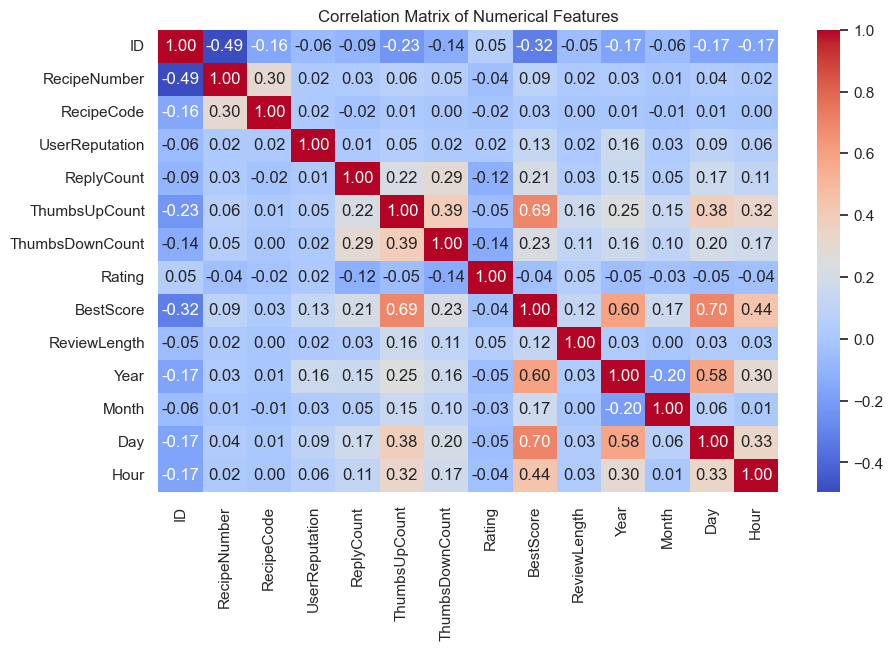

In [71]:
# Calculate the correlation matrix
numerical_correlation = train_df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6), facecolor='white')
sns.heatmap(numerical_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Observations From Correlation

- There's a notable positive correlation between **ThumbsUpCount** and **BestScore**, suggesting that recipes with more thumbs up tend to have higher best scores.

- **ReplyCount** shows a moderate positive correlation with **ThumbsUpCount** and **ThumbsDownCount**, indicating that recipes with more replies might also receive more thumbs up and thumbs down.

- Most other correlations are relatively weak, indicating that there are no strong linear relationships between these features.

### Multi-collinearity check

In [72]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming train_df is your DataFrame containing the training data

t = train_df.copy()

df_with_constant = add_constant(t)

# Filter only numeric columns
numeric_columns = df_with_constant.select_dtypes(include=[np.number]).columns

# Create a DataFrame that will hold the VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_with_constant[numeric_columns].values, i) for i in range(len(numeric_columns))]

# # Format VIF values for readability
# vif_data["VIF"] = [f'{v:.2f}' for v in vif_data["VIF"]]

print(vif_data)

            feature           VIF

0             const  3.252427e+08

1                ID  1.494322e+00

2      RecipeNumber  1.432187e+00

3        RecipeCode  1.100562e+00

4    UserReputation  1.034611e+00

5        ReplyCount  1.132863e+00

6     ThumbsUpCount  2.518959e+00

7   ThumbsDownCount  1.344118e+00

8            Rating  1.037649e+00

9         BestScore  4.920170e+00

10     ReviewLength  1.041844e+00

11             Year  2.189759e+00

12            Month  1.246059e+00

13              Day  2.199054e+00

14             Hour  1.269893e+00


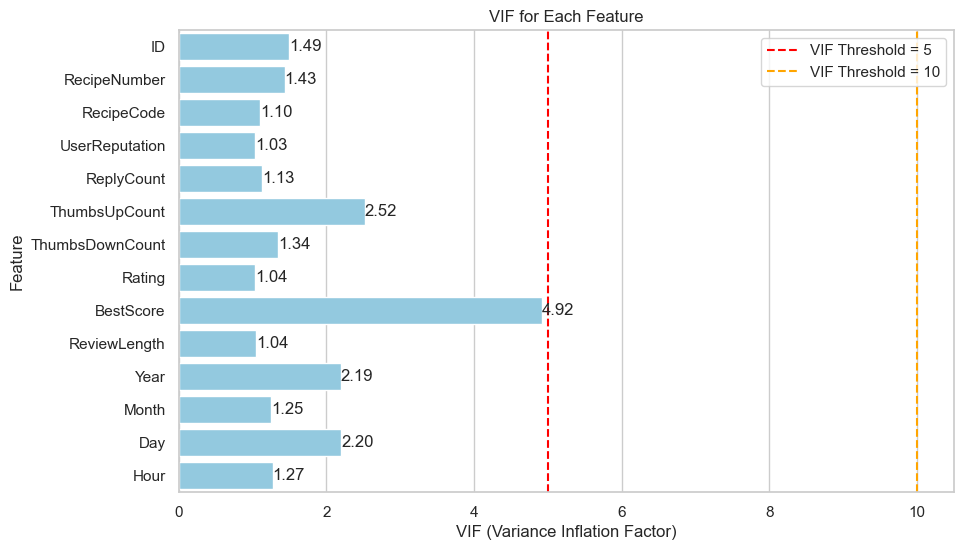

In [73]:
# Remove the constant value if it exists
vif_data = vif_data[vif_data['feature'] != 'const']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='VIF', y='feature', data=vif_data, color='skyblue')

# Add horizontal lines for VIF thresholds
plt.axvline(x=5, color='red', linestyle='--', label='VIF Threshold = 5')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF Threshold = 10')

# Add data labels
for index, value in enumerate(vif_data['VIF']):
    barplot.text(value, index, f'{value:.2f}', va='center')

# Add labels and title
plt.xlabel('VIF (Variance Inflation Factor)')
plt.ylabel('Feature')
plt.title('VIF for Each Feature')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Categorical Features

In [74]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform Chi-square test for a single categorical variable
def chi_square_test(data, cat_var, rating_var):
    contingency_table = pd.crosstab(data[cat_var], data[rating_var])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# Identify categorical variables
categorical_variables = train_df.select_dtypes(include=['object', 'category']).columns

# Perform Chi-square tests for all categorical variables
p_values = {}
rating_var = 'Rating'  # Adjust if your rating column has a different name
for cat_var in categorical_variables:
    if cat_var != rating_var:  # Exclude the rating variable itself
        p_values[cat_var] = chi_square_test(train_df, cat_var, rating_var)

# Create DataFrame of categorical variables and p-values
p_values_df = pd.DataFrame({'Categorical Variable': list(p_values.keys()), 'p-value': [round(p, 3) for p in p_values.values()]})

# Sort DataFrame by p-value
p_values_df_sorted = p_values_df.sort_values(by='p-value')

print("Table of Categorical Variables and Their Corresponding p-values:")
print(p_values_df_sorted)

Table of Categorical Variables and Their Corresponding p-values:

  Categorical Variable  p-value

0           RecipeName    0.000

2               UserID    0.000

3             UserName    0.000

4        Recipe_Review    0.002

1            CommentID    0.494


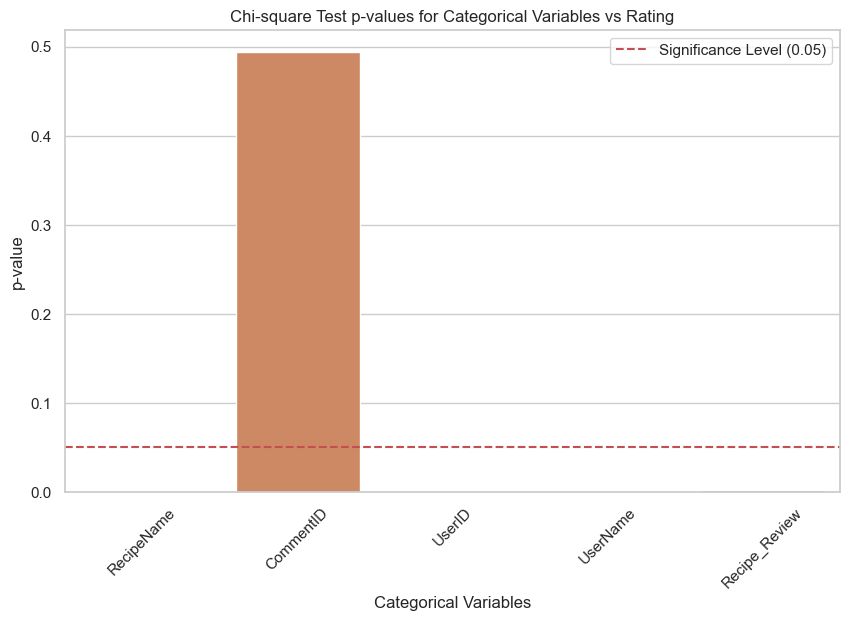

In [75]:
# Visualize p-values
plt.figure(figsize=(10, 6))  # Increase the width of the figure
sns.barplot(x=list(p_values.keys()), y=list(p_values.values()))
plt.xlabel('Categorical Variables')
plt.ylabel('p-value')
plt.title('Chi-square Test p-values for Categorical Variables vs Rating')
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

Unique RecipeNames: 100


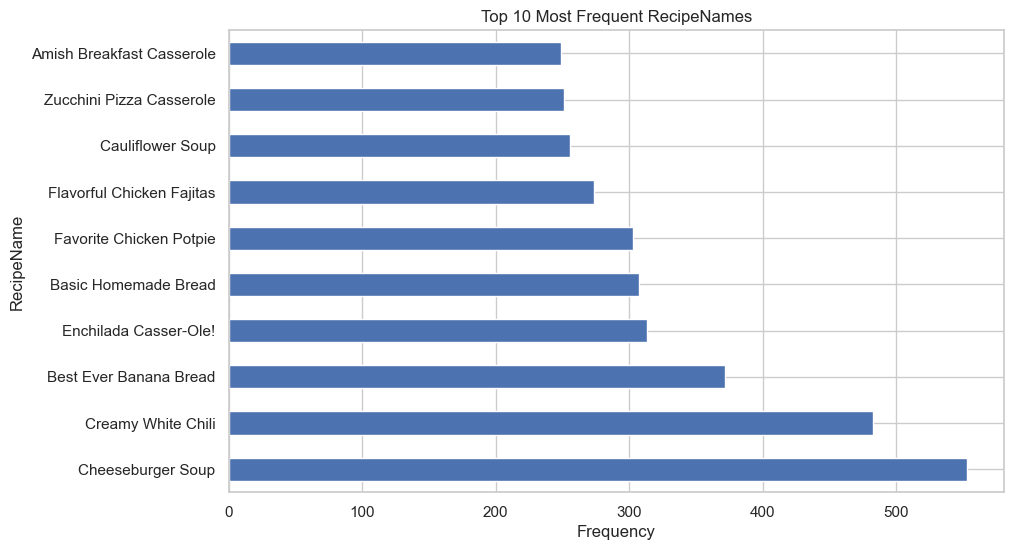

In [76]:
# Analyzing the distribution of unique categories in categorical features

# Count of unique RecipeNames
unique_recipe_names = train_df['RecipeName'].nunique()

# Display the counts
print('Unique RecipeNames:', unique_recipe_names)

# Plotting the top 10 most frequent RecipeNames
plt.figure(figsize=(10, 6), facecolor='white')
train_df['RecipeName'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Most Frequent RecipeNames')
plt.xlabel('Frequency')
plt.ylabel('RecipeName')
plt.show()

Unique UserNames: 10620


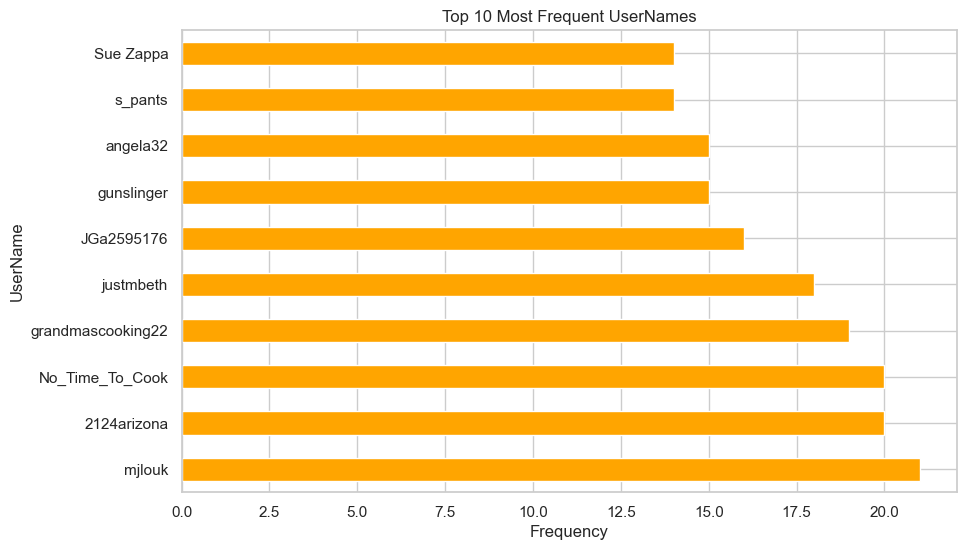

In [77]:
# Count of unique UserNames
unique_user_names = train_df['UserName'].nunique()
print('Unique UserNames:', unique_user_names)
# Plotting the top 10 most frequent UserNames
plt.figure(figsize=(10, 6), facecolor='white')
train_df['UserName'].value_counts().head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Most Frequent UserNames')
plt.xlabel('Frequency')
plt.ylabel('UserName')
plt.show()

### Calculating the most frequent 

In [78]:
# Select only the categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Calculate the most frequent category for each categorical column
most_frequent_categories = {col: train_df[col].value_counts().idxmax() for col in categorical_columns}

# Display the most frequent categories
print(most_frequent_categories)

{'RecipeName': 'Cheeseburger Soup', 'CommentID': 'sp_aUSaElGf_12259_c_149978', 'UserID': 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm', 'UserName': 'mjlouk', 'Recipe_Review': 'Delicious!'}


### Patterns in User Preferences

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

t_df = train_df.copy()
# Combine RecipeName and Recipe_Review into a single text column for analysis
t_df['Combined_Text'] = t_df['RecipeName'].astype(str) + ' ' + t_df['Recipe_Review'].astype(str)

# Use TF-IDF Vectorizer to transform the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(t_df['Combined_Text'])

# Compute cosine similarity between recipes based on the combined text
cosine_sim = cosine_similarity(X, X)

# Convert cosine similarity matrix to DataFrame for easier manipulation
cosine_sim_df = pd.DataFrame(cosine_sim)

# Display the shape of the cosine similarity matrix to understand its size
print(cosine_sim_df.shape)

(13636, 13636)


In [80]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plotting the cosine similarity matrix
# plt.figure(figsize=(10, 8))  # Reduced figure size
# sns.heatmap(cosine_sim, cmap='coolwarm', xticklabels=False, yticklabels=False)
# plt.title('Cosine Similarity Matrix of Recipes')
# plt.xlabel('Recipes')
# plt.ylabel('Recipes')
# plt.show()

## Data Preprocessing

### Removing Unnecessary Columns

In [81]:
# Assuming categorical_columns is a list of column names you want to drop
train_df.drop(columns=['CommentID'], inplace=True)

In [82]:
test_df.drop(columns=['CommentID'], inplace=True)

In [83]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

In [84]:
numeric_features

Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'ReviewLength', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [85]:
categorical_features

Index(['RecipeName', 'UserID', 'UserName', 'Recipe_Review'], dtype='object')

### Scaling Numeric Variables , Encoding Categorical variables , text preprocessing

In [86]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
             'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 
             'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
             'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
             'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
             'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
             'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
             'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
             'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
             't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
             'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
             "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
             'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
             "wouldn't", 'also', 'hi', 'em', 'would', 'let', 'went', 'ff', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
             'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'u', 'v', 'w', 'y', 'z', 'soooooo', 'oh', 'un', 'pb',
             'didnt', 'fyi', 'x', 'gr', 'oz', 'ia', 'ummmmmmmmmmmmmmm', 'goooouooood', 'may', 'sooo', 'non', 'dont', 
             'oz', 'se', 'ton', 'el', 'yummmmmyyyyyy', 'mmmm', 'oj', 'lt', 'couldnt', 'fo', 'yummmm', 'xl', 'mmmmmmmmmmmmmm',
             'ir', 'lid', 'k', 'tom', 'au', 'xxxx', 'lb', 'lg', 'ot', 'sa', 'bbq', 'tho', 'arent', 'yay', 'yeah', 'gf', 'pg',
             'isnt', 'whim', 'lo', 'ww', 'pts', 'ad', 'hmmmmmm', 'de', 'hmmmm', 'ts', 'joe', 'pa', 'tia', 'onto', 'bc', 'uk',
             'dah', 'witht', 'tbl', 'da', 'ty', 'wont', 'yummmmmmmy', 'ths', 'ie', 'gt', 'vic', 'ish', 'han', 'ap', 'ito', 
             'tbs', 'ony', 'soo', 'hr', 'pkg', 'wah', 'la', 'yummmmmy', 'pm', 'lf', 'wa', 'ohh', 'ins', 'jam', 'ez', 'ed', 
             'san', 'coma', 'ca', 'dh', 'luv', 'sop', 'ta', 'mug', 'dr', 'mmm', 'yr', 'ne', 'ha', 'boo', 'tdf', 'duh', 'sw',
             'tso', 'gen', 'tha', 'na', 'mor', 'ect', 'ann', 'vs', 'im', 'yumm', 'ome', 'btw', 'fl', 'lip', 'ree', 'aka', 
             'yummymy', 'yummo', 'ps', 'chs', 'umm', 'iv', 'likea', 'ono', 'dee', 'yummmmm', 'yu', 'mex', 'disn', 'mrs',
             'sp', 'ppl', 'andthe', 'jyst', 'idk', 'co', 'soooooooo', 'yuk', 'tbis', 'dtr', 'dint', 'oooohhhh', 'tbls', 
             'tp', 'qt', 'tj', 'mmmmmmm', 'cr', 'pj', 'nm', 'tofh', 'jb', 'ut', 'ian', 'du', 'os', 'itfor', 'bt', 'ohhh', 
             'ache', 'haha', 'pd', 'wil', 'imwould', 'hb', 'ol', 'ya', 'wee', 'ethis', 'ti', 'ii', 'az', 'il', 'amy', 'ur',
             'ohio', 'nom', 'mu', 'hamb', 'huh', 'hobo', 'nc', 'yayyy', 'opt', 'acs', 'sb', 'lm', 'ehhh', 'mak', 'nj', 'ex',
             'od', 'al', 'li', 'yo', 'thi', 'ga', 'js', 'vt', 'foo', 'eh', 'nw', 'chz', 'cpl', 'rec', 'amt', 'ooohs', 'aaahs',
             'tb', 'ooze', 'og', 'mmmmmmmm', 'bd', 'mc', 'bu', 'tx', 'mmhh', 'mmmmmmmmm', 'jf', 'ft', 'abd', 'ohhhh', 
             'sooooooooo', 'lee', 'yummmmy', 'ar', 'soooooooooo', 'mm', 'yt', 'bf', 'tooo', 'dd', 'tg', 'tv',
             'yummmmmmmyyyyy', 'ec', 'jp', 'wy', 'ckn', 'rf', 'wi', 'ul', 'ozs', 'gmo', 'br', 'mo', 'fe', 'ffs',  
             'cam', 'lu', 'cp', 'ck', 'kk', 'hehe', 'ml', 'oi', 'wn', 'tl', 'mmmh', 'gs', 'oe', 'ho', 'nto', 'th', 'ox',
             'dz', 'oooh', 'hmm', 'mmmmmm', 'hmmm', 'oohhhhhhhhhhhhhhh', 'myyyyyyyyyyy', 'ea', 'toooooo', 'di', 'doo', 
             'yummmmmmm', 'sc', 'ooooh', 'ummmmmmmmmmmmmmm', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
             'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 
             'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',
             'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am',
             'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
             'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
             'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
             'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
             'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
             'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
             'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o',
             're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
             "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
             "won't", 'wouldn', "wouldn't"]



In [87]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# stopwords = ENGLISH_STOP_WORDS
def text_processing(text):
    if pd.isnull(text):
        return ''
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    unique_words = set()
    text = ' '.join(word for word in text.split() if (word not in unique_words) and (unique_words.add(word) or True))
    text = ' '.join(word for word in text.split() if not any(char in word for char in set('!@#$%^&*()_+[]{}|;\':\",.<>?/`~')))
    text = ' '.join(text.split())
    # Tokenize the text
    tokens = text.split()
    # Filter out stopwords
    tokens = [word.lower() for word in tokens if word.lower() not in stopwords]
    return ' '.join(tokens)

# Drop rows with NaN values in the 'Recipe_Review' column
train_df.dropna(subset=['Recipe_Review'], inplace=True)

numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

if 'Recipe_Review' in categorical_features:
    categorical_features.remove('Recipe_Review')  # Remove text column from categorical features
if 'Rating' in numeric_features:
    numeric_features.remove('Rating')
    
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Define additional parameters for TfidfVectorizer
tfidf_params = {
    'preprocessor': text_processing,
    'stop_words': 'english',  
    'sublinear_tf': True,      
}

# Create the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(**tfidf_params), 'Recipe_Review')
    ]
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline on the data
pipeline.fit(train_df)

# Get the feature names for categorical features after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names
feature_names = numeric_features + list(cat_feature_names) + ['Recipe_Review_tfidf']

In [88]:
# Transform the data
transformed_data = pipeline.fit_transform(train_df)

transformed_data

<13634x33367 sparse matrix of type '<class 'numpy.float64'>'
	with 424327 stored elements in Compressed Sparse Row format>

In [89]:
# Convert sparse matrix to DataFrame
df = pd.DataFrame.sparse.from_spmatrix(transformed_data)

df

,0,1,2,3,4,5,6,7,8,9,...,33357,33358,33359,33360,33361,33362,33363,33364,33365,33366
0,-0.436471,1.091001,-0.398953,1.768603,-0.10575,-0.263626,-0.166511,-0.376874,0.337645,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.419373,1.663960,-0.568819,-0.115050,-0.10575,-0.263626,0.139695,-0.376874,1.176699,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.880494,-1.200833,-0.793661,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.314953,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.975050,0.383229,3.286308,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.839362,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.521959,-0.897502,-0.086101,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.402354,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,-0.051771,2.000995,-0.419553,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.262512,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13630,2.145290,-1.099723,-0.014378,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,0.524101,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13631,-0.291140,-0.054916,-0.067721,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-1.124873,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13632,-0.624546,0.821374,0.129738,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.827708,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df.reset_index(drop=True, inplace=True)
train_df['Rating'].reset_index(drop=True, inplace=True)
# Concatenate the 'Rating' column from train_df with df
concatenated_df = pd.concat([df, train_df['Rating']], axis=1)

concatenated_df

,0,1,2,3,4,5,6,7,8,9,...,33358,33359,33360,33361,33362,33363,33364,33365,33366,Rating
0,-0.436471,1.091001,-0.398953,1.768603,-0.10575,-0.263626,-0.166511,-0.376874,0.337645,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,-0.419373,1.663960,-0.568819,-0.115050,-0.10575,-0.263626,0.139695,-0.376874,1.176699,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2.880494,-1.200833,-0.793661,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.314953,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,-0.975050,0.383229,3.286308,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.839362,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,-0.521959,-0.897502,-0.086101,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.402354,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,-0.051771,2.000995,-0.419553,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.262512,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
13630,2.145290,-1.099723,-0.014378,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,0.524101,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
13631,-0.291140,-0.054916,-0.067721,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-1.124873,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
13632,-0.624546,0.821374,0.129738,-0.115050,-0.10575,-0.263626,-0.166511,-0.376874,-0.827708,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [91]:
concatenated_df.dropna(inplace = True)

In [92]:
# Transform the test data using the already fitted pipeline
trans_test_data = pipeline.transform(test_df)

# Convert sparse matrix to DataFrame
test_df_transformed = pd.DataFrame.sparse.from_spmatrix(trans_test_data)

# Assuming the test data doesn't have the 'Rating' column, you don't need to concatenate it

In [93]:
test_df_transformed

,0,1,2,3,4,5,6,7,8,9,...,33357,33358,33359,33360,33361,33362,33363,33364,33365,33366
0,-0.299689,0.214712,0.820507,-0.11505,-0.10575,-0.263626,-0.166511,-0.376874,-0.466449,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.162906,0.484339,-0.780639,-0.11505,-0.10575,-0.263626,0.139695,-0.376874,0.215283,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.298733,0.484339,-0.780639,-0.11505,-0.10575,-0.263626,-0.166511,-0.376874,-0.955897,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.881012,1.697663,-0.856800,-0.11505,-0.10575,0.696385,0.752107,0.417505,-0.128497,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.804072,1.057298,0.438654,-0.11505,-0.10575,-0.263626,0.139695,-0.376874,0.856227,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,0.264537,-0.223433,-0.187468,-0.11505,-0.10575,-0.263626,-0.166511,-0.376874,0.693077,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4542,-0.000478,1.192112,0.215613,-0.11505,-0.10575,-0.263626,-0.166511,-0.376874,-0.746133,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4543,0.102109,1.158408,0.808407,-0.11505,-0.10575,-0.263626,-0.166511,-0.376874,-0.868495,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4544,-0.256944,-0.897502,-0.086101,-0.11505,-0.10575,-0.263626,0.139695,-0.376874,-0.821881,-0.170694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
test_df_transformed.dropna(inplace = True)

### Dividing Training data into train and val Data

In [95]:
X = concatenated_df.drop(columns='Rating')
y = concatenated_df['Rating']

In [96]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10907, 33367), (2727, 33367), (10907,), (2727,))

## Modelling

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

#### Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Classifier: logistic regression with lbfgs solver
solver = 'saga'
logistic_reg = LogisticRegression(solver=solver, penalty='l1')
logistic_reg.fit(X_train, y_train)

# Predictions on train and test sets
y_train_pred = logistic_reg.predict(X_train)
y_val_pred = logistic_reg.predict(X_val)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Train Accuracy for solver {solver}: {train_accuracy:.4f}")
print(f"Test Accuracy for solver {solver}: {test_accuracy:.4f}")

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

  warnings.warn(


Train Accuracy for solver saga: 0.7684

Test Accuracy for solver saga: 0.7642


In [62]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support



           0       0.55      0.19      0.29       254

           1       0.44      0.10      0.16        42

           2       1.00      0.06      0.11        35

           3       0.54      0.09      0.16        74

           4       0.37      0.08      0.13       248

           5       0.79      0.98      0.88      2074



    accuracy                           0.77      2727

   macro avg       0.62      0.25      0.29      2727

weighted avg       0.72      0.77      0.71      2727




#### Hyper-parameter tuning

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_digits


# Pipeline definition
pipeline = Pipeline([
    ('logistic', LogisticRegression())
])

# Parameter grid for grid search
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1'],
    'logistic__tol': [1e-4, 1e-3, 1e-2],
    'logistic__solver': ['saga']
}

# Grid search with cross-validation
grid_log = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=8)

# Fit the grid search to find the best parameters
grid_log.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_log.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameters: {'logistic__C': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'saga', 'logistic__tol': 0.0001}


C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge

  warnings.warn(


In [70]:
# Get the best hyperparameters
best_params = grid_log.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model from GridSearchCV
best_model_log = grid_log.best_estimator_

y_pred_log_train = best_model_log.predict(X_train)
y_pred_log = best_model_log.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_log)
print("Test Accuracy:", accuracy)

accuracy = accuracy_score(y_train, y_pred_log_train)
print("Train Accuracy:", accuracy)

Best Hyperparameters: {'logistic__C': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'saga', 'logistic__tol': 0.0001}

Test Accuracy: 0.7653098643197653

Train Accuracy: 0.7754652975153571


#### Confusion matrix

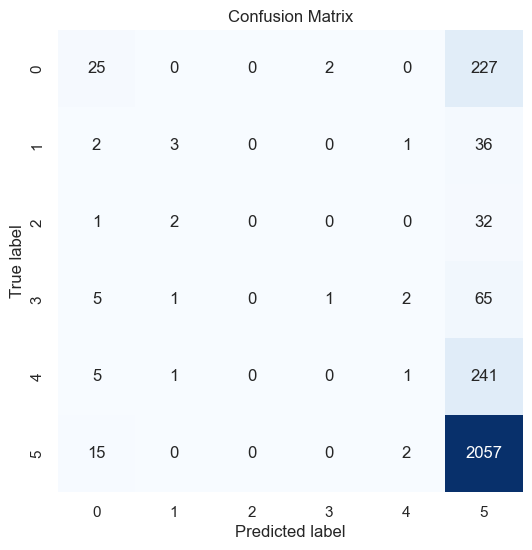

In [71]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### Classification report

In [72]:
# Print classification report
print(classification_report(y_val, y_pred_log))

              precision    recall  f1-score   support



           0       0.47      0.10      0.16       254

           1       0.43      0.07      0.12        42

           2       0.00      0.00      0.00        35

           3       0.33      0.01      0.03        74

           4       0.17      0.00      0.01       248

           5       0.77      0.99      0.87      2074



    accuracy                           0.77      2727

   macro avg       0.36      0.20      0.20      2727

weighted avg       0.66      0.77      0.68      2727




C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


### ROC Curve

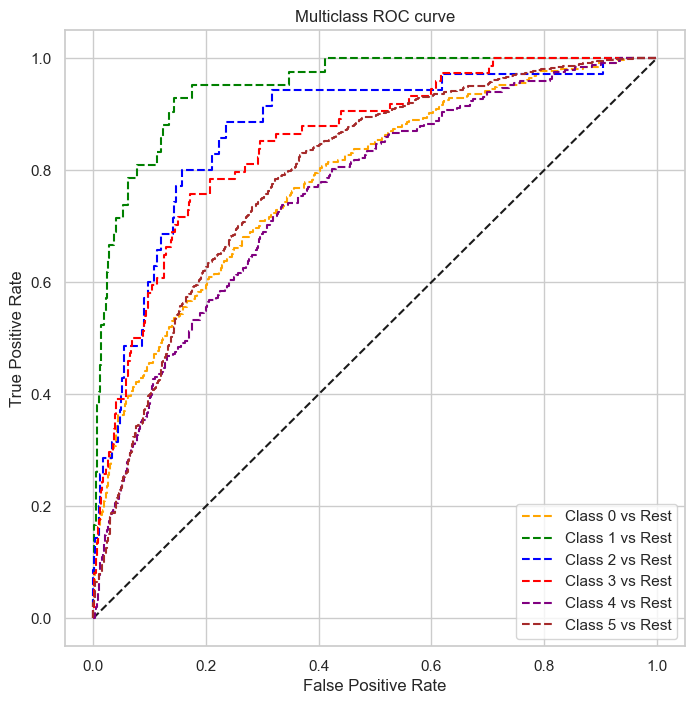

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# Replace with your multi-class model
model = OneVsRestClassifier(LogisticRegression(solver=solver, penalty='l1'))
# Train the model on your data (X_train, y_train)
model.fit(X_train, y_train)

# Predict probabilities on test data
y_score = model.predict_proba(X_val)

# Extract labels
y_true = y_val

# A dictionary to store ROC curves and AUCs for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop through all classes
for i in range(len(np.unique(y_true))):
  y_i_true = y_true == i
  y_i_score = y_score[:, i]
  fpr[i], tpr[i], _ = roc_curve(y_i_true, y_i_score)
  roc_auc[i] = roc_auc_score(y_i_true, y_i_score)

# Plot ROC curves for all classes
plt.figure()
for i in range(len(np.unique(y_true))):
  plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (OvR)')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

#### Model

In [56]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the pipeline
pipeline = Pipeline([
  # TruncatedSVD with 100 components
    ('clf', DecisionTreeClassifier())  # DecisionTreeClassifier
])

# Fit the pipeline on the resampled training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_dt = pipeline.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.6978364503116978


#### Hyper-parameter tuning

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define the hyperparameters grid
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(estimator=pipeline, param_grid=param_grid_dt, cv=5, scoring='accuracy' ,n_jobs = 8)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=8,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [58]:
# Print the best parameters found
print("Best Parameters:", grid_search_dt.best_params_)

# Get the best estimator
best_pipeline_dt = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt = best_pipeline_dt.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_dt)
print("Accuracy:", accuracy)

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Accuracy: 0.757975797579758


In [59]:
y_pred_dt_train = best_pipeline_dt.predict(X_train)

#### Confusion matrix

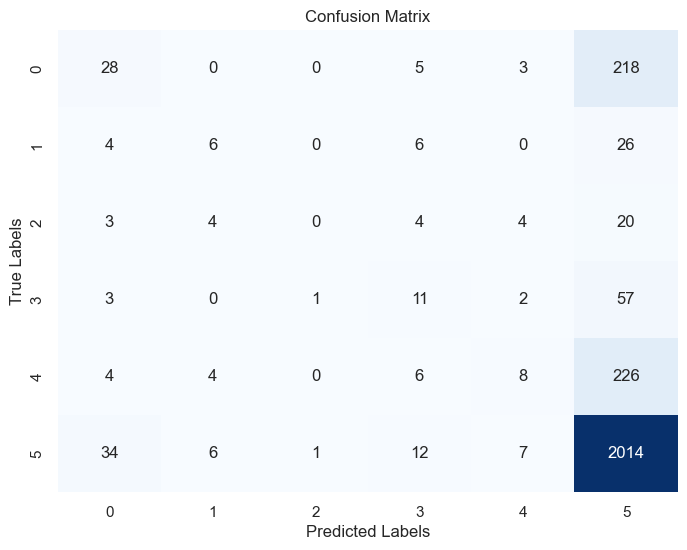

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#### Classification report

In [61]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_val, y_pred_dt)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:

              precision    recall  f1-score   support



           0       0.37      0.11      0.17       254

           1       0.30      0.14      0.19        42

           2       0.00      0.00      0.00        35

           3       0.25      0.15      0.19        74

           4       0.33      0.03      0.06       248

           5       0.79      0.97      0.87      2074



    accuracy                           0.76      2727

   macro avg       0.34      0.23      0.25      2727

weighted avg       0.67      0.76      0.69      2727




#### Learning Curve

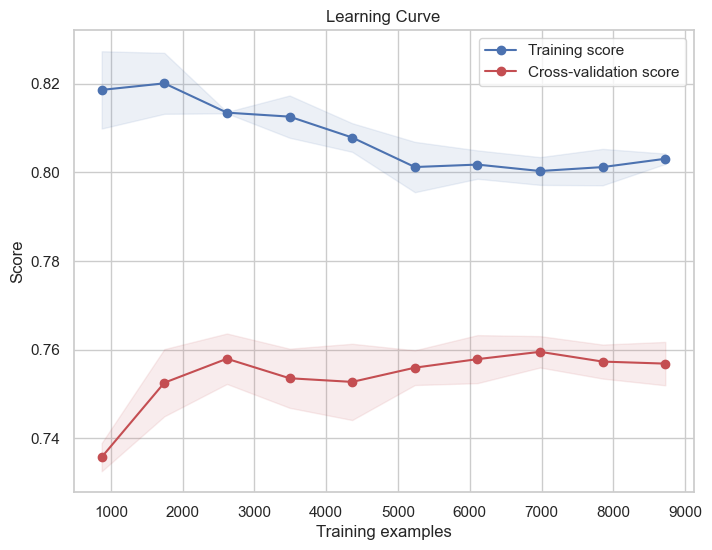

In [62]:
from sklearn.model_selection import learning_curve

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(best_pipeline_dt, X_train, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### XgBoost

#### Model

In [50]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Instantiate the XGBoost classifier
xgb_classifier = XGBClassifier(objective='multi:softprob',  # Multiclass classification objective
    eval_metric='mlogloss',       # Evaluation metric for multiclass classification
    max_delta_step=1)            # Set a max delta step for convergence) 

# Fit the model on the resampled training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
from sklearn.metrics import accuracy_score

# Predict labels for the test data
y_pred_xgb = xgb_classifier.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


#### Hyper-parameter tuning

In [107]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# Define a pipeline
pipeline = Pipeline([
    ('classifier', xgb.XGBClassifier(objective='multi:softprob',  # Multiclass classification objective
                                      eval_metric='mlogloss',       # Evaluation metric for multiclass classification
                                      max_delta_step=1, ))          # XGBoost classifier
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [3, 5, 7],            # Maximum depth of the tree
    'classifier__learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'classifier__reg_alpha': [0, 0.1],      # L1 regularization term on weights
    'classifier__reg_lambda': [0, 0.1]     # L2 regularization term on weights
}


# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(pipeline, param_grid_xgb, cv=2, scoring=make_scorer(accuracy_score), n_jobs = 8 , verbose = 2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='mlogloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             n_jobs=8,
             param_grid={'classifier__learning_rate': [0.1, 0.01, 0.001],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__reg_alpha': [0, 0.1],
                         'classifier__reg_lambda': [0, 0.1]},
             scoring=make_scorer(accuracy_score), verbose=2)

In [108]:
# Print the best parameters found
print("Best Parameters:", grid_search_xgb.best_params_)

# Get the best estimator
best_pipeline_xgb = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred_grid_xgb = best_pipeline_xgb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val , y_pred_grid_xgb)
print("Test Accuracy:", accuracy)

Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.1}

Accuracy: 0.7799779977997799


In [124]:
y_pred_grid_xgb_train = best_pipeline_xgb.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train , y_pred_grid_xgb_train)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8927294398092968


#### Confusion matrix

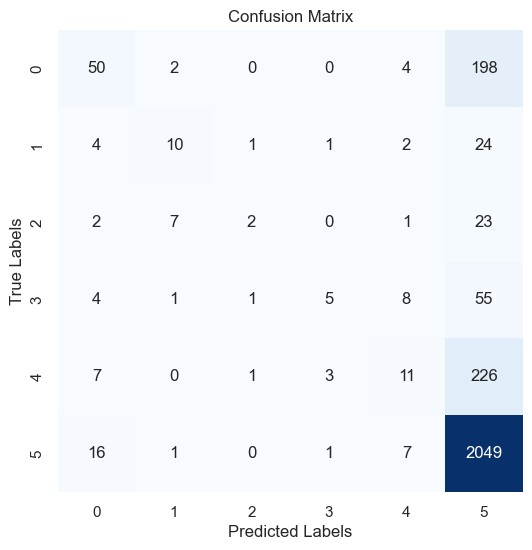

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_grid_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification report

In [111]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_val, y_pred_grid_xgb)

print("Classification Report:")
print(class_report)

Classification Report:

              precision    recall  f1-score   support



           0       0.60      0.20      0.30       254

           1       0.48      0.24      0.32        42

           2       0.40      0.06      0.10        35

           3       0.50      0.07      0.12        74

           4       0.33      0.04      0.08       248

           5       0.80      0.99      0.88      2074



    accuracy                           0.78      2727

   macro avg       0.52      0.27      0.30      2727

weighted avg       0.72      0.78      0.71      2727




### LGBM

#### Model

In [84]:
from lightgbm import LGBMClassifier

# Instantiate the LGBM classifier
lgbm_classifier = LGBMClassifier( objective='multiclass',          # Multiclass classification objective
                                 metric='multi_logloss',          # Evaluation metric
                                            )

# Fit the model on the resampled training data
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042888 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Total Bins 43661

[LightGBM] [Info] Number of data points in the train set: 10907, number of used features: 1259

[LightGBM] [Info] Start training from score -2.371565

[LightGBM] [Info] Start training from score -4.173196

[LightGBM] [Info] Start training from score -4.362686

[LightGBM] [Info] Start training from score -3.613580

[LightGBM] [Info] Start training from score -2.396429

[LightGBM] [Info] Start training from score -0.273752


LGBMClassifier(metric='multi_logloss', objective='multiclass')

In [85]:
# Make predictions on the test set
y_pred_lgbm = lgbm_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_lgbm)
print("Test Accuracy:", accuracy)

Accuracy: 0.7796112944627797


In [87]:
# Make predictions on the test set
y_pred_lgbm_train = lgbm_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_lgbm_train)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.9316035573484918


#### Hyper-parameter tuning

In [98]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid = {
    'lgbm__num_leaves': [10, 20, 30],
    'lgbm__max_depth': [4, 6, 8],
    'lgbm__learning_rate': [0.1, 0.05, 0.01],
    'lgbm__reg_alpha': [0, 0.1],  # Added the closing square bracket here
    'lgbm__reg_lambda': [0, 0.1]
}

# Define the pipeline
pipeline = Pipeline([
    ('lgbm', LGBMClassifier(objective='multiclass',metric='multi_logloss'))
])

# Instantiate GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=2 ,n_jobs = 7 , verbose = 2)

# Fit the model on the resampled training data
grid_search_lgbm.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016697 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 43661

[LightGBM] [Info] Number of data points in the train set: 10907, number of used features: 1259

[LightGBM] [Info] Start training from score -2.371565

[LightGBM] [Info] Start training from score -4.173196

[LightGBM] [Info] Start training from score -4.362686

[LightGBM] [Info] Start training from score -3.613580

[LightGBM] [Info] Start training from score -2.396429

[LightGBM] [Info] Start training from score -0.273752

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[Light

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('lgbm',
                                        LGBMClassifier(metric='multi_logloss',
                                                       objective='multiclass'))]),
             n_jobs=7,
             param_grid={'lgbm__learning_rate': [0.1, 0.05, 0.01],
                         'lgbm__max_depth': [4, 6, 8],
                         'lgbm__num_leaves': [10, 20, 30],
                         'lgbm__reg_alpha': [0, 0.1],
                         'lgbm__reg_lambda': [0, 0.1]},
             scoring='accuracy', verbose=2)

In [99]:
# Get the best parameters and estimator
best_params = grid_search_lgbm.best_params_
best_estimator = grid_search_lgbm.best_estimator_

# Make predictions on the validation set
y_pred_grid_lgbm = best_estimator.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_grid_lgbm)
print("Best Parameters:", best_params)
print("Testing Accuracy:", accuracy)

Best Parameters: {'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 6, 'lgbm__num_leaves': 10, 'lgbm__reg_alpha': 0.1, 'lgbm__reg_lambda': 0}

Testing Accuracy: 0.7752108544187752


In [100]:
y_pred_grid_lgbm_train = best_estimator.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_grid_lgbm_train)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.8310259466397726


#### Confusion matrix

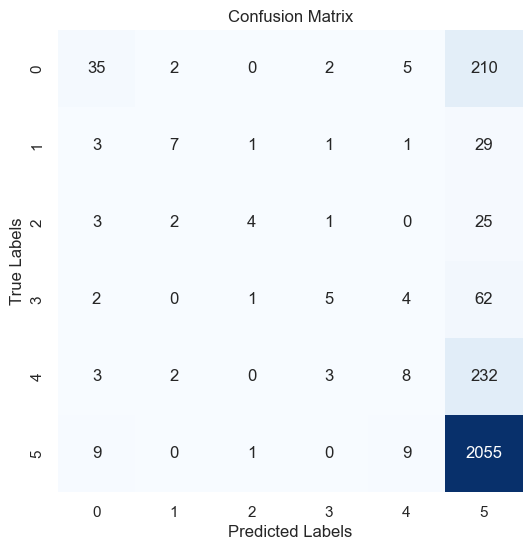

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_grid_lgbm)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Classification report

In [103]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_val, y_pred_grid_lgbm)

print("Classification Report:")
print(class_report)

Classification Report:

              precision    recall  f1-score   support



           0       0.64      0.14      0.23       254

           1       0.54      0.17      0.25        42

           2       0.57      0.11      0.19        35

           3       0.42      0.07      0.12        74

           4       0.30      0.03      0.06       248

           5       0.79      0.99      0.88      2074



    accuracy                           0.78      2727

   macro avg       0.54      0.25      0.29      2727

weighted avg       0.71      0.78      0.70      2727




#### Learning Curve

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003894 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 2941

[LightGBM] [Info] Number of data points in the train set: 872, number of used features: 146

[LightGBM] [Info] Start training from score -2.536683

[LightGBM] [Info] Start training from score -4.205840

[LightGBM] [Info] Start training from score -4.824879

[LightGBM] [Info] Start training from score -3.305054

[LightGBM] [Info] Start training from score -2.364070

[LightGBM] [Info] Start training from score -0.265005

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

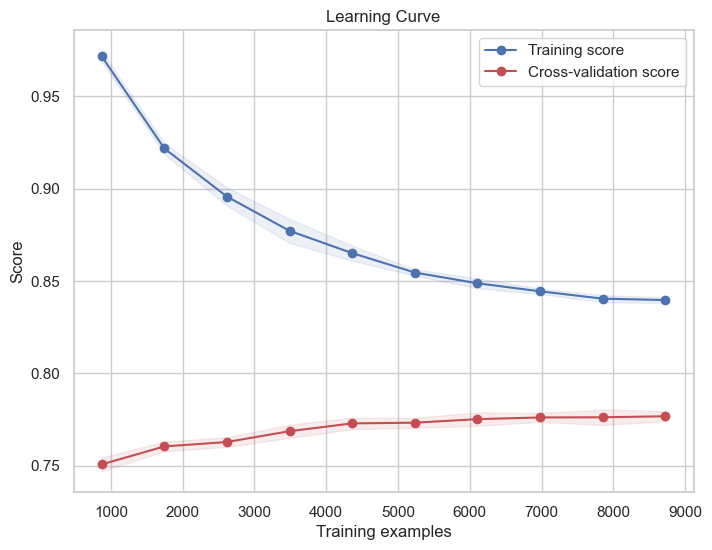

In [104]:
from sklearn.model_selection import learning_curve

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train, y_train , train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

### ROC Curve

[LightGBM] [Info] Number of positive: 1018, number of negative: 9889

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044087 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 43661

[LightGBM] [Info] Number of data points in the train set: 10907, number of used features: 1259

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.093335 -> initscore=-2.273583

[LightGBM] [Info] Start training from score -2.273583

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Info] Number of positive: 168, number of negative: 10739

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055128 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Info] Total Bins 43661



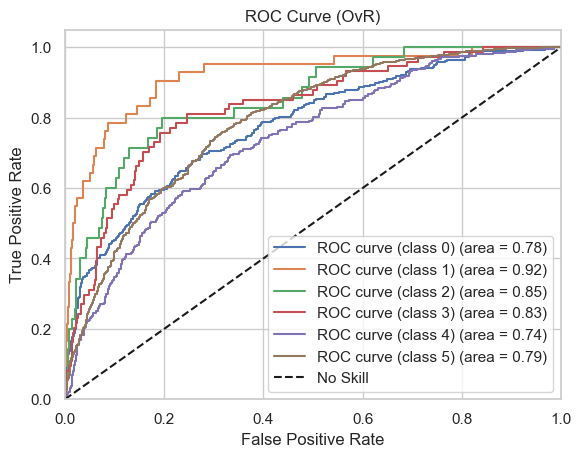

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LGBMClassifier(learning_rate=0.1, 
                                            max_depth=6, 
                                            num_leaves=10, 
                                            reg_alpha=0.1, 
                                            reg_lambda=0))

# Train the model on your data (X_train, y_train)
model.fit(X_train, y_train)

# Predict probabilities on test data
y_score = model.predict_proba(X_val)

# Extract labels
y_true = y_val

# A dictionary to store ROC curves and AUCs for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop through all classes
for i in range(len(np.unique(y_true))):
  y_i_true = y_true == i
  y_i_score = y_score[:, i]
  fpr[i], tpr[i], _ = roc_curve(y_i_true, y_i_score)
  roc_auc[i] = roc_auc_score(y_i_true, y_i_score)

# Plot ROC curves for all classes
plt.figure()
for i in range(len(np.unique(y_true))):
  plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (OvR)')
plt.legend(loc="lower right")
plt.show()

## Comparison of Different Models

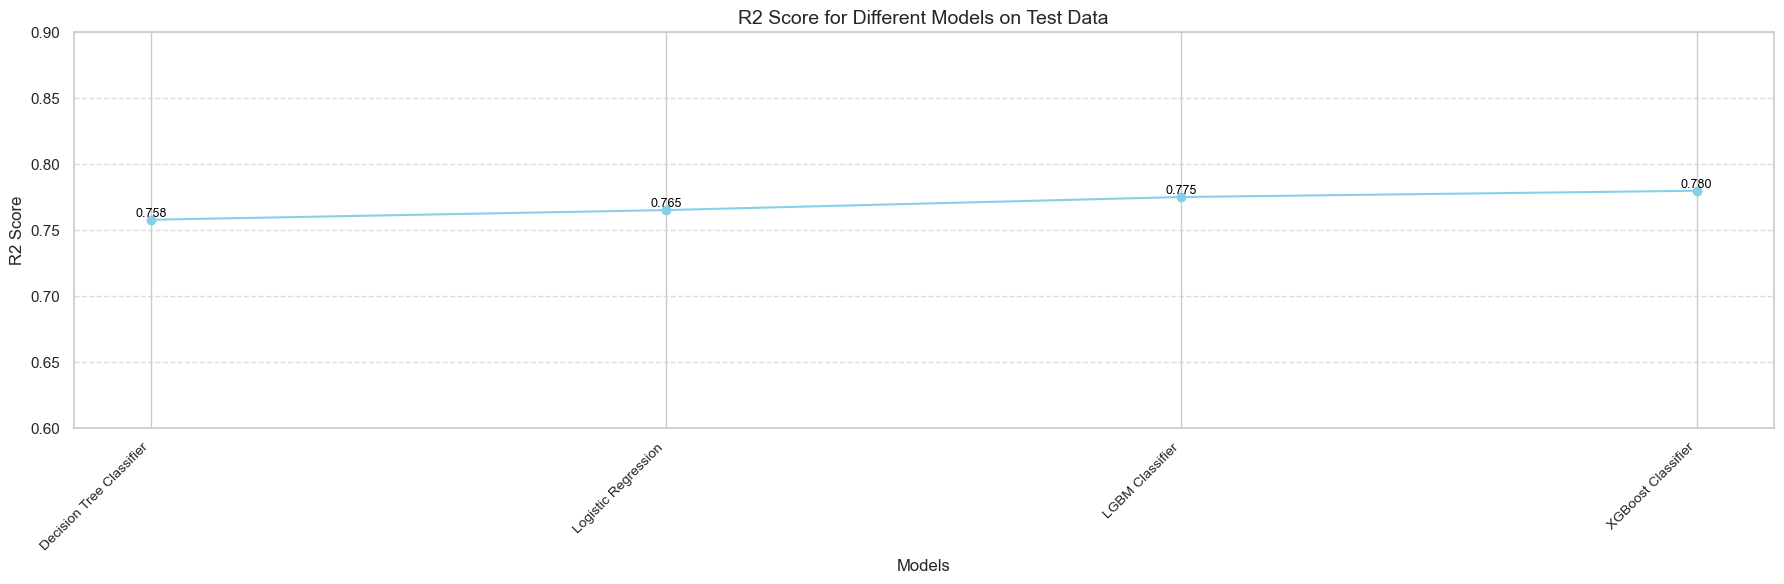

In [118]:
import matplotlib.pyplot as plt

# Store model names along with their R2 scores in a dictionary
model_r2_scores = {
    'Logistic Regression': 0.7653098643197653,
    'XGBoost Classifier': 0.7799779977997799,
    'Decision Tree Classifier': 0.757975797579758,
    'LGBM Classifier': 0.7752108544187752
}

# Sort the dictionary by R2 score (optional, for better visualization)
sorted_model_r2_scores = dict(sorted(model_r2_scores.items(), key=lambda item: item[1]))

# Create a line plot for test data
plt.figure(figsize=(18, 6))  # Adjust figure size for better visibility
plt.plot(sorted_model_r2_scores.keys(), sorted_model_r2_scores.values(), marker='o', color='skyblue', linestyle='-')
plt.xlabel('Models', fontsize=12)  # Adjust font size
plt.ylabel('R2 Score', fontsize=12)  # Adjust font size
plt.title('R2 Score for Different Models on Test Data', fontsize=14)  # Adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and adjust font size
plt.ylim(0.6, 0.9)  # Set ylim to ensure consistency for comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for model, r2_score in sorted_model_r2_scores.items():
    plt.text(model, r2_score, f'{r2_score:.3f}', ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

## Best Model Prediction

In [119]:
best_pipeline_xgb.fit(X,y)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [121]:
test_predictions = best_pipeline_xgb.predict(test_df_transformed)

In [122]:
# Assuming 'test_predictions' is a NumPy array or a Pandas Series containing your predicted ratings

# Generate numbers from 1 to 4546
submission_index = np.arange(1, 4547)

# Create the submission DataFrame
submission_df = pd.DataFrame({'ID': submission_index, 'Rating': test_predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [123]:
submission_df

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,1
